In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

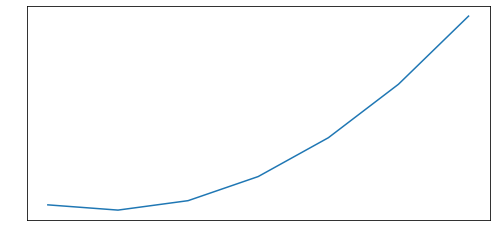

-1 2 0 0 1.0
0 0 1 2 1.0
1 2 2 8 5.0
2 8 3 18 13.0
3 18 4 32 25.0
4 32 5 50 41.0
5 50 6 72 61.0
{-1: 1, 0: 1, 1: 5, 2: 13, 3: 25, 4: 41, 5: 61}
[6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 6, 2, 6, 6, 4, 6, 4, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 4, 5, 5, 6, 6, 3, 4, 4, 4, 6, 2, 5, 6, 3, 3, 5, 3, 6, 5, 5, 6, 6, 5, 1, 6, 6, 6, 3, 6, 0, 5, 2, 6, 6, 4, 5, 6, 5, 6, 6, 6, 4, 6, 5, 5, 3, 5, 2, 6, 4, 6, 4, 5, 5, 4, 3, 4, 4, 6, 5, 6, 6, 4, 6, 6, 5, 4, 6, 5, 6, 6, 3, 2, 3, 5, 5, 4, 6, 6, 6, 4, 5, 6, 6, 6, 4, 5, 5, 5, 3, 4, 6, 5, 6, 4, 5, 5, 6, 5, 4, 5, 4, 5, 3, 6, 5, 6, 6, 4, 6, 3, 5, 4, 3, 6, 6, 5, 6, 5]


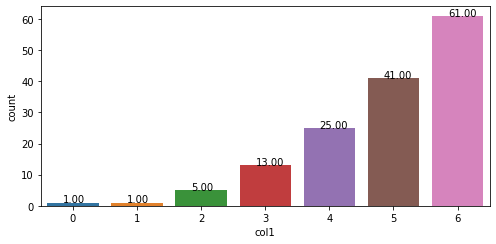

In [121]:
def random_naive_dist(min_value, max_value, step, formula = lambda x:x, round_to_step = True, seeds = 1000):
    # set max for rounded output to have an extra bin for the last one
    min_value = min_value - step if round_to_step else min_value
    window_size = float(max_value) - float(min_value)
    max_counts = {}
    bin_counts = {}
    rand_list = []
    # plot dirstribution
    xpts = np.linspace(min_value, max_value, round(window_size/step))
    plt.plot(xpts, formula(xpts))
    plt.tick_params(color='white',labelcolor='white')
    plt.show()
    # loop in bracket
    for i in np.arange(min_value, max_value, step):
        x1 = formula(i)
        x2 = formula(i+step)
        integral = (abs(x1)+abs(x2))*step/2
        max_counts[i] = round(integral)
        bin_counts[i] = 0
        print(i, x1, i+step, x2, integral)
    print(max_counts)

    # loop in seeds
    for i in range(seeds):
        rand = 1 if round_to_step else random.random()
        for i in np.arange(min_value, max_value, step):
            new_rand = (i) + ((rand) * (step))
            if bin_counts[i] < max_counts[i]:
                rand_list.append(new_rand)
                bin_counts[i] += 1
                break
    new_x = list(rand_list)  # make a copy
    random.shuffle(new_x)
    print(new_x)
    return rand_list



a = random_naive_dist(0, 6, 1, lambda x:2*x**2)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
df = pd.DataFrame(dict(col1=np.array(a)))
ax = sns.countplot(x="col1", data=df)
for p in ax.patches:
   ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()